# Starting with Networkx

### Networkx API documentation

https://networkx.org/documentation/stable/reference/index.html

### Networkx tutorial

https://networkx.org/documentation/stable/tutorial.html

# Importing required modules

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

You can see what's in a module using `dir` (I will not actually run it because it prints out a lot)

In [2]:
dir(nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__author__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 

In [3]:
nx.__version__

'2.5.1'

# Basic data types in NetworkX

NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops

**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges

**MultiDiGraph** - Directed Graph with self loops and multiple edges

# Getting started
Create an empty, undirected network

In [4]:
#generate an undirected empty graph
G = nx.Graph()

#generate a directed empty graph
DG = nx.DiGraph()

# Nodes

Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it. The only constraint is that it has to be [hashable](https://docs.python.org/3/glossary.html). In practice, the most common thing in Python that is _not_ hashable is a list, so we will typically use tuples in their place.

Nodes can be added one at a time:

In [5]:
G.add_node(0)
G.add_node("John")

# tuple object representing, say, longitude and latitude
pos = (1.2, 3.4) 
G.add_node(pos)

print(G.nodes)

[0, 'John', (1.2, 3.4)]


...or many at once from a Python container

In [6]:
# [1,2,3] is a list containing 1, 2, and 3
G.add_nodes_from([1, 2, 3])

print(G.nodes)

[0, 'John', (1.2, 3.4), 1, 2, 3]


# Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary

Adding attributes at the time of node creation using keyword arguments:

In [7]:
G.add_node("Louis", eye_color='blue', height=6)

print(G.nodes)

[0, 'John', (1.2, 3.4), 1, 2, 3, 'Louis']


You can also add attributes to an already existing node

In [8]:
G.add_node("Laszlo")

# add an attribute "citations" with value 10**6 to Laszlo
G.nodes["Laszlo"]["citations"] = 10**6

print(G.nodes)

[0, 'John', (1.2, 3.4), 1, 2, 3, 'Louis', 'Laszlo']


Print node labels and attributes

In [9]:
print(G.nodes(data=True))

[(0, {}), ('John', {}), ((1.2, 3.4), {}), (1, {}), (2, {}), (3, {}), ('Louis', {'eye_color': 'blue', 'height': 6}), ('Laszlo', {'citations': 1000000})]


`G.nodes[n]` gives a dictionary containing all the attribute:value pairs associated with node `n`

In [10]:
print("Louis's eyes are ", G.nodes["Louis"]["eye_color"], " and he is ", G.nodes['Louis']['height'], " feet tall.")
print("Laszlo has ", G.nodes["Laszlo"]["citations"], " citations.")

Louis's eyes are  blue  and he is  6  feet tall.
Laszlo has  1000000  citations.


In [11]:
# this is an error: node 0 has no attribute 'eye_color'. Try to exectute.
# G.nodes[0]['eye_color']

# Edges

An edge between `node1` and `node2` is represented by a tuple `(node1, node2)`  
They can be added one at a time:

In [12]:
# add edge between node 0 and node 1
G.add_edge(0, 1)

Or many at once from a container

In [13]:
edge_list = [ (2, 1), ("Louis", "Laszlo"), (3, "Laszlo")]
G.add_edges_from(edge_list)

print(G.edges)

[(0, 1), (1, 2), (3, 'Laszlo'), ('Louis', 'Laszlo')]


Nodes will be automatically created if they don't already exist.

In [14]:
edge_list = [("Biel", "Arnau"), ((1.2, 3.4), 1)]
G.add_edges_from(edge_list)

print(G.nodes)

[0, 'John', (1.2, 3.4), 1, 2, 3, 'Louis', 'Laszlo', 'Biel', 'Arnau']


# Edge attributes
Like nodes, edges can also have arbitrary attributes. An important and special one (for many algorithms) is "weight"  

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [15]:
G.add_edge("Laszlo", "Louis", weight=0.05)

G.add_edge("Montreal", "Boston")
G.edges["Montreal", "Boston"]['distance'] = 254.82

`G.edges[node1, node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

In [16]:
print(G.edges["Montreal", "Boston"])

{'distance': 254.82}


# Basic operations

### Size of the network

In [17]:
# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

12
12
7
7
G has 12 nodes and 7 edges.


### Testing to see whether nodes or edges exist

In [18]:
G.has_node("Louis")

True

More Pythonic way

In [19]:
"Laszlo" in G

True

Also Pythonic, but more explicit:

In [20]:
"Louis" in G.nodes

True

For edges, you must use has_edge (no syntax like `edge in G`).

In undirected graphs (a,b)=(b,a)

In [21]:
print(G.has_edge(2, 1))
print(G.has_edge("Louis", 0))

True
False


### Finding neighbors of a node

In [22]:
list(G.neighbors(1))

[0, 2, (1.2, 3.4)]

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

### Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

In [23]:
for node, data in G.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t: {1}".format(node, data))

Node 0		: {}
Node John		: {}
Node (1.2, 3.4)		: {}
Node 1		: {}
Node 2		: {}
Node 3		: {}
Node Louis		: {'eye_color': 'blue', 'height': 6}
Node Laszlo		: {'citations': 1000000}
Node Biel		: {}
Node Arnau		: {}
Node Montreal		: {}
Node Boston		: {}


In [24]:
for n1, n2, data in G.edges(data=True):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

0 <----> 1: {}
(1.2, 3.4) <----> 1: {}
1 <----> 2: {}
3 <----> Laszlo: {}
Louis <----> Laszlo: {'weight': 0.05}
Biel <----> Arnau: {}
Montreal <----> Boston: {'distance': 254.82}


In [25]:
for n1, n2 in G.edges():
    print(n1, n2)

0 1
(1.2, 3.4) 1
1 2
3 Laszlo
Louis Laszlo
Biel Arnau
Montreal Boston


### Calculating degrees

In [26]:
# one node
print(G.degree("Louis")) # returns an integer

# all nodes (returns a view of a dictionary with node : degree pairs for all nodes)
print(G.degree())
degrees = G.degree()

1
[(0, 1), ('John', 0), ((1.2, 3.4), 1), (1, 3), (2, 1), (3, 1), ('Louis', 1), ('Laszlo', 2), ('Biel', 1), ('Arnau', 1), ('Montreal', 1), ('Boston', 1)]


In [27]:
# just the degree sequence
print([G.degree(node) for node in G])

[1, 0, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1]


As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) # same as G.degree()`


# Other operations

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`to_numpy_array(G)`***      
adjacency matrix A of G (in dense matrix format; to get sparse matrix, use `nx.adjacency_matrix(G)`)

In [28]:
nx.to_numpy_array(G, weight=None)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [29]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [30]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  12
Number of edges:  7

Average degree:  1.1666666666666667
Average degree (alternate calculation) 1.1666666666666667

Minimum degree:  0
Maximum degree:  3


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

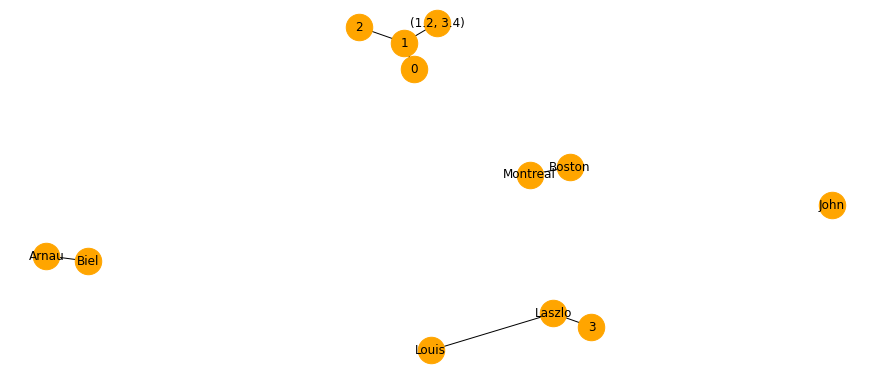

In [31]:
# Plot the graph
fig = plt.figure(figsize=(12,5))
nx.draw_spring(G, node_size=700, node_color='orange', with_labels=True)

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

## Reading in an edge list from a file
Put the file `test.txt` from .zip data file into your working directory for IPython  
If you don't know the present working directory, you can get it by typing  

`%pwd`

in any cell

In [32]:
%pwd

'/home/arlandis/dades/ownCloud-ITI/docencia/sna/GIT_TS+PL/workshop/notebook-1'

Let's read in a file with the following options:
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [33]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('./test.txt', 
                     comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [34]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

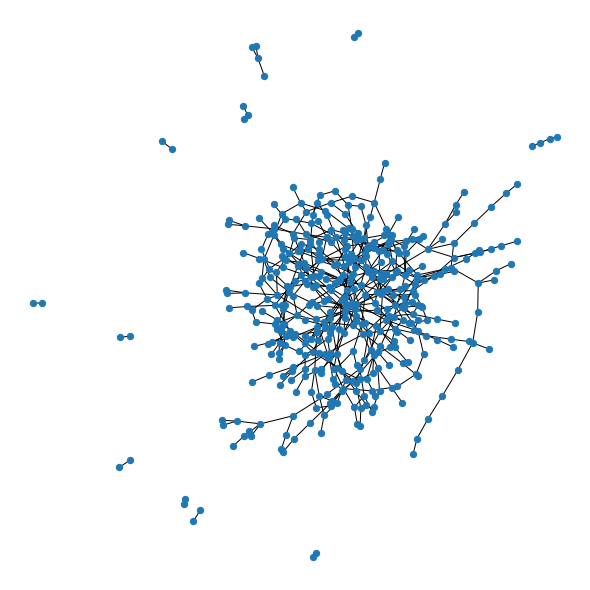

In [35]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

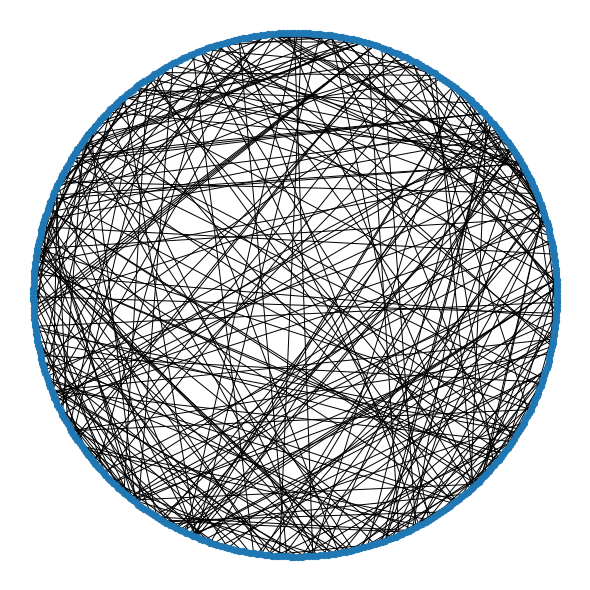

In [36]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=40)

# Plotting the degree distribution

### Plot it in log scale

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

In [37]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

# `_` indicates that `np.histogram()` is returning a tuple of two items, and we don't care about
# what's in the second element. what is the other thing it's returning? check the docs:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [38]:
bin_edges

array([1.        , 1.25992105, 1.58740105, 2.        , 2.5198421 ,
       3.1748021 , 4.        , 5.0396842 , 6.34960421, 8.        ])

In [39]:
density

array([0.9835914 , 0.        , 0.        , 0.66588267, 0.34197798,
       0.        , 0.14362175, 0.01381729, 0.00411255])

Now plot it

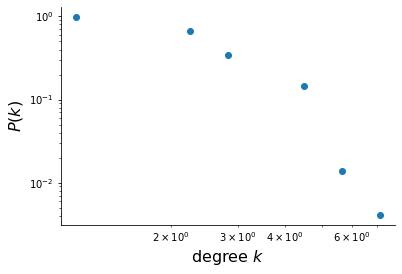

In [40]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network withe anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

### Plot it in linear scale

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

In [41]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Now plot it

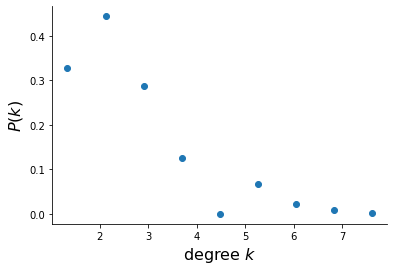

In [42]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

# Hands-on exercise
Now split into 6 groups, 3 for `example_1.txt` and 3 for `example_2.txt`. Each group should read in their edge
list file and do the following:
* Group 1: Do the basic measurements shown above. What can you suspect about the degree distribution of the network just based on the average and extremes in degree?
* Group 2: Plot the degree distribution in log-log scale. Also plot it in linear scale. Comment on how this fits with the analysis of Group 1.
* Group 3: Draw the network using the two layout algorithms shown above. How does the the network's appearance echo the findings of groups 1 and 2?

## Solutions (`example_1.txt`)

### Read the file. Obtain and print the basic measurements shown above:

In [43]:
# You will need to change this if your file is in different location
G1 = nx.read_edgelist('./example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')
degrees = [G1.degree[node] for node in G1]

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

Number of nodes:  443
Number of edges:  540

Average degree: 5.982
Minimum degree:  3
Maximum degree:  98


This network clearly has a skewed degree distribution, with the average being close to th minimum and the maximum being significantly higher. This alone is not enough to conclude that the network has a power-law or other heavy-tailed distribution, however.

### Plot the degree distribution in log scale:

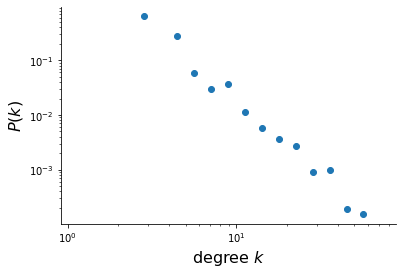

In [44]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

Looks linear on a log-log-scale, but it's still dicey to call it a "power law" since < two orders of magnitude doesn't really scream "I don't have a scale!"

### Plot the graph:

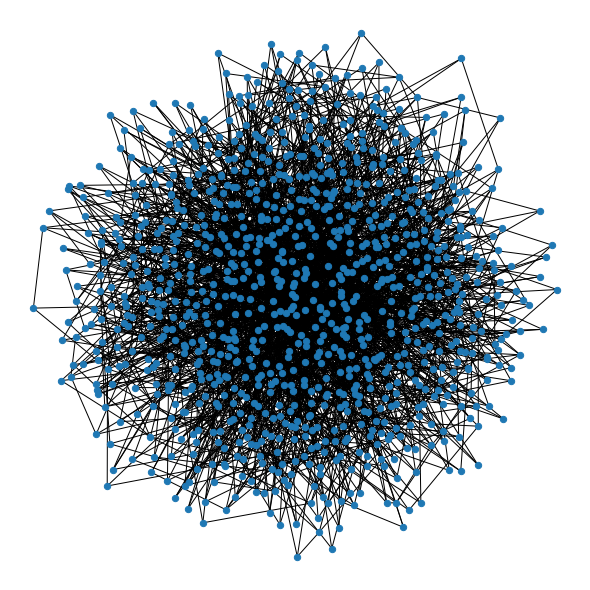

In [45]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G1, node_size=40)

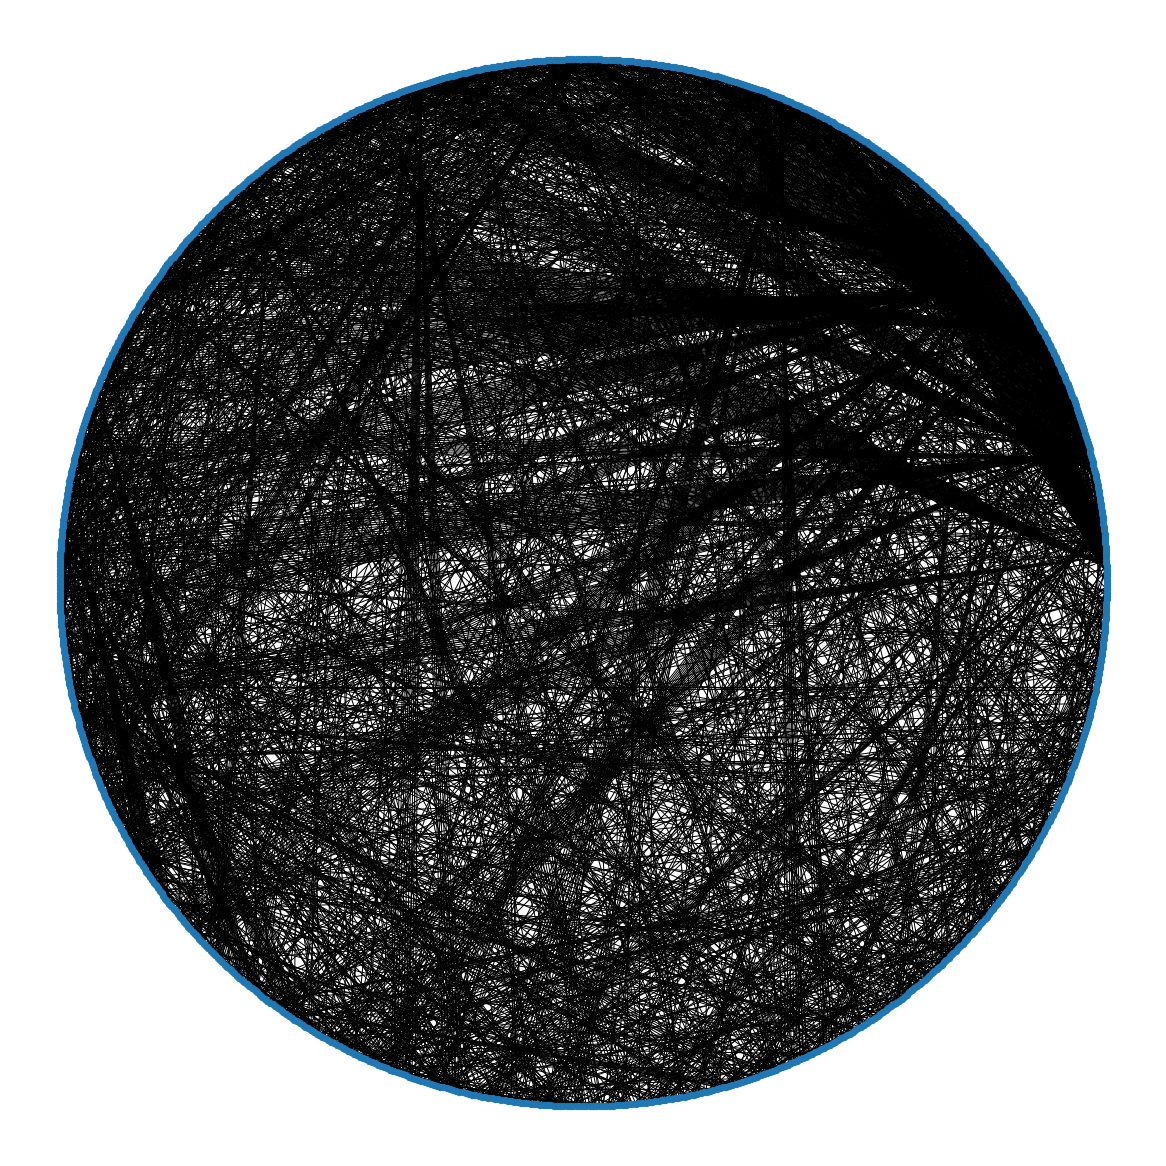

In [46]:
# using the circular layout algorithm
fig = plt.figure(figsize=(16,16))
nx.draw_circular(G1, node_size=40)

Difficult to make sense of the first "hairball", but the circular layout (when sufficiently magnified) clearly shows there are a few nodes with an inordinate number of links, consistent with a heavy-tailed degree distribution. In fact, this network was generated according to the Barabasi-Albert model.

## Solutions (`example_2.txt`)

In [47]:
# You will need to change this if your file is in different location
G2 = nx.read_edgelist('./example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')
degrees = [G2.degree[node] for node in G2]
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))

Number of nodes:  443
Number of edges:  540

Average degree: 16.761421319796955
Minimum degree:  1
Maximum degree:  43


This appears to be a narrow degree distribution with a mean right in the middle of the range. However it's too soon to conclude a particular network model (e.g. ER) from these summary statistics alone.

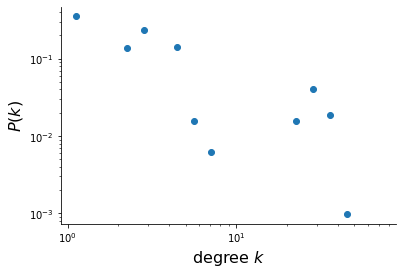

In [48]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

Well this certainly looks weird. The degree distribution is bimodal, which happens neither in the ER model nor the BA model.

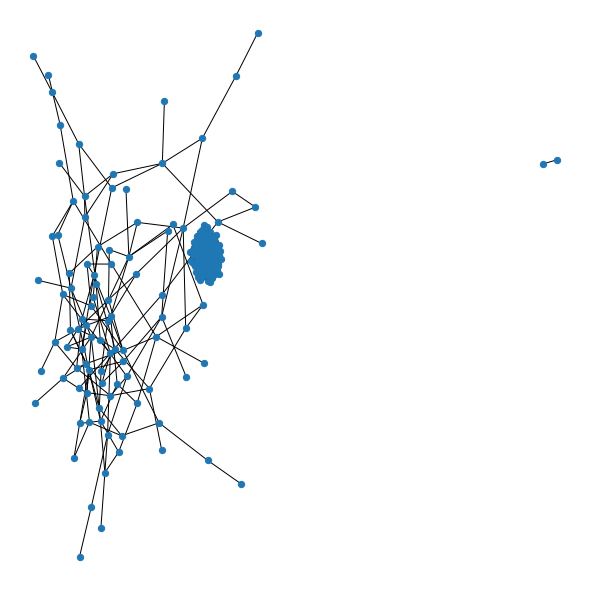

In [49]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G2, node_size=40)

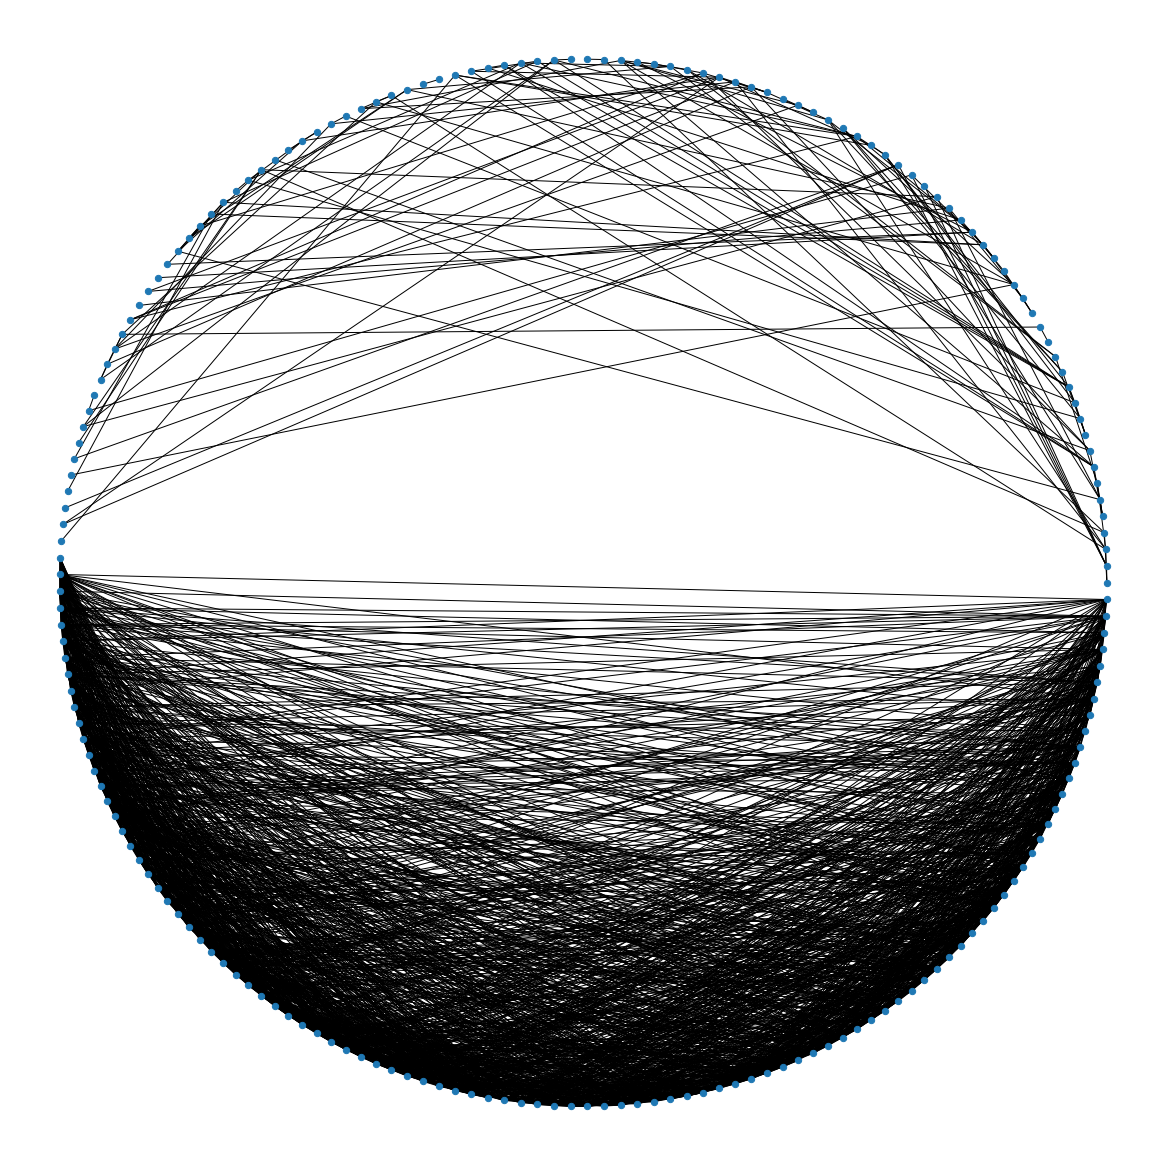

In [50]:
# using the circular layout algorithm
fig = plt.figure(figsize=(16,16))
nx.draw_circular(G2, node_size=40)

Aha! Mystery solved. The two peaks in the degree distribution occur because this network consists of two components, each with different charachteristics. One is much more dense (higher avg. degree) than the other, as both visualizations show. In fact, this network is two ER networks with different parameters glued together with `nx.disjoint_union`